# Lab One: Visualization and Data Preprocessing
### Ryan Bass, Brett Benefield, Cho Kim, Nicole Wittlin

In [ ]:
# https://stackoverflow.com/questions/38918653/pandas-invalid-literal-for-long-with-base-10-error
# https://stackoverflow.com/questions/15325182/how-to-filter-rows-in-pandas-by-regex

In [158]:
%matplotlib inline

NameError: name 'warnings' is not defined

In [160]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from IPython.display import HTML, display

In [138]:
%cd "C:\sandbox\SMU\dataMining\7331DataMining\EducationDataNC\2017\Raw Datasets"
dfCollege = pd.read_csv("college-enrollment.csv")
dfTeachers = pd.read_csv("personnel.csv")

C:\sandbox\SMU\dataMining\7331DataMining\EducationDataNC\2017\Raw Datasets


In [139]:
# Create a list of columns that are a specific data type
nominal = ['graduation_year', 'unit_code', 'leaname', 'schname', 'status', 'subgroup', 'subgroup_name']
continuous = ['schcount', 'leacount', 'seacount']
ordinal = ['sch_percent_enrolled', 'lea_percent_enrolled', 'sea_percent_enrolled']

# Convert data to correct data type
dfCollege[nominal] = dfCollege[nominal].astype(object)
dfCollege[continuous] = dfCollege[continuous].astype(float)
dfCollege[ordinal] = dfCollege[ordinal].astype(float)

In [140]:
# Only look at the overall total of students that enrolled in college
# The dataset further divides it based on various categories which we can explore later
dfCollegeAll = dfCollege[(dfCollege.subgroup == "ALL") & (dfCollege.status == "ENROLL")]

# Remove schools identified by LEA and SEA unit_codes
# Not sure why this grouping of schools is treated as an invidual school (warrants further investigation)
dfCollegeAll = dfCollegeAll[~dfCollegeAll.unit_code.str.contains('LEA|SEA')]

# Remove schools that didn't report number of students enrolled in college courses (warrents further investigation)
dfCollegeAll = dfCollegeAll[~dfCollegeAll.schcount.isna()]
dfCollegeAll = dfCollegeAll[~dfCollegeAll.leacount.isna()]

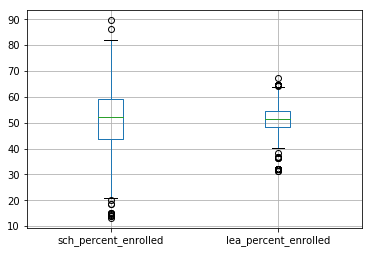

In [144]:
dfCollegeAll.boxplot(column = ['sch_percent_enrolled', 'lea_percent_enrolled'])

In [130]:
# Drop principle information since it's blank
#delCols = ['prin_other_pct', 'prinyrs_0thru3_pct', 'prinyrs_4thru10_pct', 'prinyrs_11plus_pct', 'prin_advance_dgr_pct', '_1yr_prin_trnovr_pct', 'prin_male_pct', 'prin_female_pct', 'prin_black_pct', 'prin_white_pct']
#dfTeachersHS = dfTeachersHS.drop(axis = 1, columns = prinCols, errors = 'ignore')

# Other columns with no data
#delCols = ['highqual_class_pct', 'lea_highqual_class_pct', 'lea_highqual_class_hp_pct', 'lea_highqual_class_lp_pct', 'lea_highqual_class_all_pct', 'lea_not_highqual_class_hp_pct', 'lea_not_highqual_class_lp_pct', 'lea_not_highqual_class_all_pct', 'st_highqual_class_pct', 'st_highqual_class_hp_pct', 'st_highqual_class_lp_pct', 'st_highqual_class_all_pct', 'st_not_highqual_class_hp_pct', 'st_not_highqual_class_lp_pct', 'st_not_highqual_class_all_pct']
#dfTeachersHS = dfTeachersHS.drop(axis = 1, columns = delCols, errors = 'ignore')

# Columns we won't be looking at for now
#delCols = ['_1yr_tchr_trnovr_pct', 'emer_prov_teach_pct', 'lea_emer_prov_teach_pct']
#dfTeachersHS = dfTeachersHS.drop(axis = 1, columns = delCols, errors = 'ignore')

In [131]:
#if category_cd E or M, delete. These schools only have elementary and middle school grades, and might want to focus on HS
#since HS's reported the college enrollment rates
dfTeachersHS = dfTeachers[(dfTeachers.category_cd != "E") & (dfTeachers.category_cd != "M")]

In [132]:
# Remove schools identified by LEA and SEA unit_codes
# Not sure why this grouping of schools is treated as an invidual school (warrants further investigation)
# note for group: i think this is the way to get the district stats (LEA) and state stats (SEA)
#                 but i think we should borderline ignore district stats because districts might vary widely in their quality of 
#                 schools (i know mine did), we could later go in and accept districts with low variance on certain statistics 
#                 but we might want to do that in later projects and not this one if we don't have time
dfTeachersHS = dfTeachersHS[~dfTeachersHS.unit_code.str.contains('LEA|SEA')]

In [133]:
# renaming School_Name to schname and Lea_Name to leaname to match dfCollege variable names for merging later
dfTeachersHS['schname'] = dfTeachersHS['School_Name']
dfTeachersHS['leaname'] = dfTeachersHS['Lea_Name']

In [154]:
list(dfTeachersHS.columns)

['year',
 'unit_code',
 'category_cd',
 'total_class_teacher_num',
 'total_nbpts_num',
 'prin_other_pct',
 'prinyrs_0thru3_pct',
 'prinyrs_4thru10_pct',
 'prinyrs_11plus_pct',
 'prin_advance_dgr_pct',
 '_1yr_prin_trnovr_pct',
 'prin_male_pct',
 'prin_female_pct',
 'prin_black_pct',
 'prin_white_pct',
 'School_Name',
 'Lea_Name',
 'State_Name',
 'flicensed_teach_pct',
 'tchyrs_0thru3_pct',
 'tchyrs_4thru10_pct',
 'tchyrs_11plus_pct',
 'class_teach_num',
 'nbpts_num',
 'advance_dgr_pct',
 '_1yr_tchr_trnovr_pct',
 'emer_prov_teach_pct',
 'lateral_teach_pct',
 'highqual_class_pct',
 'lea_flicensed_teach_pct',
 'lea_tchyrs_0thru3_pct',
 'lea_tchyrs_4thru10_pct',
 'lea_tchyrs_11plus_pct',
 'lea_class_teach_num',
 'lea_nbpts_num',
 'lea_advance_dgr_pct',
 'lea_1yr_tchr_trnovr_pct',
 'lea_emer_prov_teach_pct',
 'lea_lateral_teach_pct',
 'lea_highqual_class_pct',
 'lea_highqual_class_hp_pct',
 'lea_highqual_class_lp_pct',
 'lea_highqual_class_all_pct',
 'lea_not_highqual_class_hp_pct',
 'lea_no

In [134]:
dfMergedSet = pd.merge(dfTeachersHS, dfCollegeAll, on = 'unit_code')

# deleting variables with no observations
delCols = ['prin_other_pct',
'prinyrs_0thru3_pct',
'prinyrs_4thru10_pct',
'prinyrs_11plus_pct',
'prin_advance_dgr_pct',
'_1yr_prin_trnovr_pct',
'prin_male_pct',
'prin_female_pct',
'prin_black_pct',
'prin_white_pct',
'emer_prov_teach_pct',
'highqual_class_pct',
'lea_highqual_class_pct',
'lea_highqual_class_hp_pct',
'lea_highqual_class_lp_pct',
'lea_highqual_class_all_pct',
'lea_not_highqual_class_hp_pct',
'lea_not_highqual_class_lp_pct',
'lea_not_highqual_class_all_pct',
'st_highqual_class_pct',
'st_highqual_class_hp_pct',
'st_highqual_class_lp_pct',
'st_highqual_class_all_pct',
'st_not_highqual_class_hp_pct',
'st_not_highqual_class_lp_pct',
'st_not_highqual_class_all_pct']
dfMergedSet = dfMergedSet.drop(axis = 1, columns = delCols, errors = 'ignore')

In [135]:
dfMergedSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 488
Data columns (total 61 columns):
year                       489 non-null int64
unit_code                  489 non-null object
category_cd                489 non-null object
total_class_teacher_num    489 non-null int64
total_nbpts_num            489 non-null int64
School_Name                489 non-null object
Lea_Name                   489 non-null object
State_Name                 489 non-null object
flicensed_teach_pct        489 non-null float64
tchyrs_0thru3_pct          489 non-null float64
tchyrs_4thru10_pct         489 non-null float64
tchyrs_11plus_pct          489 non-null float64
class_teach_num            489 non-null float64
nbpts_num                  489 non-null float64
advance_dgr_pct            489 non-null float64
_1yr_tchr_trnovr_pct       489 non-null float64
lateral_teach_pct          423 non-null float64
lea_flicensed_teach_pct    489 non-null float64
lea_tchyrs_0thru3_pct      489 non-null fl

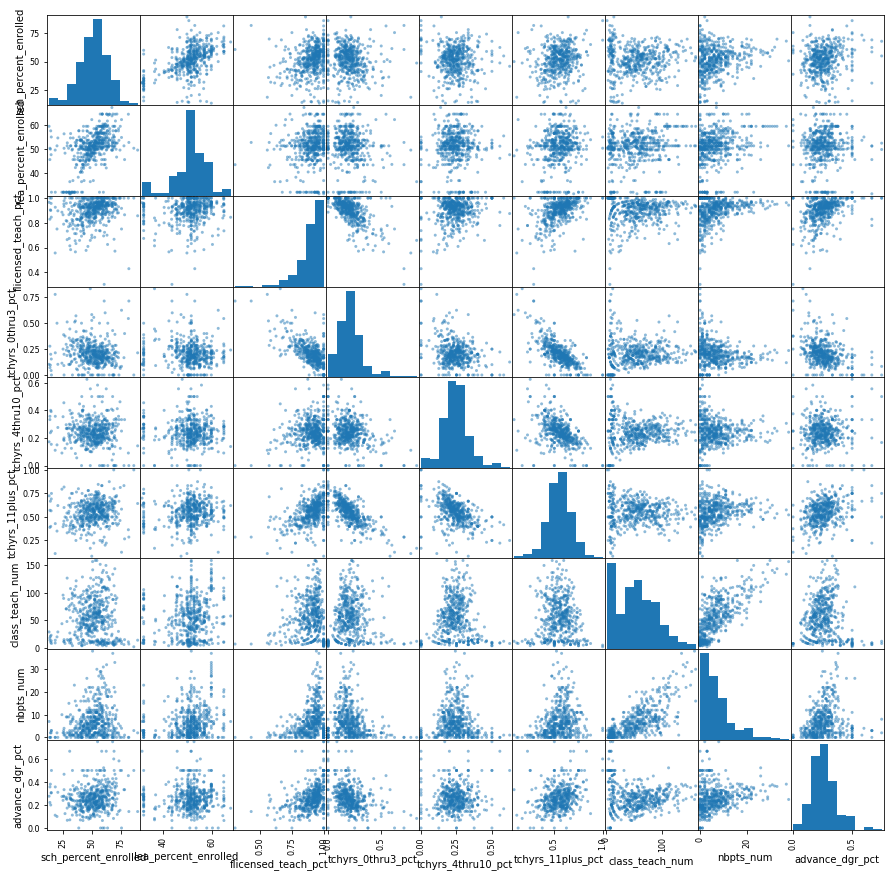

In [165]:
corrColumns = ['sch_percent_enrolled',
    'lea_percent_enrolled',
    'flicensed_teach_pct', 
    'tchyrs_0thru3_pct',
    'tchyrs_4thru10_pct',
    'tchyrs_11plus_pct',
    'class_teach_num',
    'nbpts_num',
    'advance_dgr_pct']

ax = scatter_matrix(dfMergedSet[corrColumns], figsize=(15, 15))
plt.show()

In [166]:
dfMergedSet[corrColumns].corr('pearson')

,sch_percent_enrolled,lea_percent_enrolled,flicensed_teach_pct,tchyrs_0thru3_pct,tchyrs_4thru10_pct,tchyrs_11plus_pct,class_teach_num,nbpts_num,advance_dgr_pct
sch_percent_enrolled,1.000000,0.501103,0.215344,-0.094840,-0.082986,0.149332,0.023321,0.188221,0.139220
lea_percent_enrolled,0.501103,1.000000,0.146896,-0.115229,-0.014867,0.118379,0.132110,0.219924,0.023420
flicensed_teach_pct,0.215344,0.146896,1.000000,-0.645872,0.192618,0.462725,0.039419,0.291137,0.386627
tchyrs_0thru3_pct,-0.094840,-0.115229,-0.645872,1.000000,-0.297572,-0.716992,0.027853,-0.199418,-0.376755
tchyrs_4thru10_pct,-0.082986,-0.014867,0.192618,-0.297572,1.000000,-0.452138,-0.000115,-0.042173,0.043827
tchyrs_11plus_pct,0.149332,0.118379,0.462725,-0.716992,-0.452138,1.000000,-0.025915,0.217028,0.319995
class_teach_num,0.023321,0.132110,0.039419,0.027853,-0.000115,-0.025915,1.000000,0.726350,-0.058027
nbpts_num,0.188221,0.219924,0.291137,-0.199418,-0.042173,0.217028,0.726350,1.000000,0.181671
advance_dgr_pct,0.139220,0.023420,0.386627,-0.376755,0.043827,0.319995,-0.058027,0.181671,1.000000


### Business Understanding

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

#### Why data was collected?
 - Data was made possible by John M. Belk Endowment. The founder and the endowment believe in the value of education. 
 - One of their operating principles is "closing achievement gaps" which is defined as follows: "Increasing access to postsecondary education can bolster educational and economic success. We will focus our resource to eliminate barriers for students who are underrepresented on the pathways to success"
 - Purpose is to identify features that directly impact measures of academic success. How is academic success measured by school? Could it be college standardized exam scores (ACT, SAT)? State standardized testing scores? Percentage of students in AP or IB courses and corresponding results?
 
#### Define and Measure outcomes:
 - see last bullet above 
 - or find a new variable (from existing data) that explains school performance?

### Data Meaning Type
Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

In [8]:
display(HTML('<table><tr><td>Column Name</td><td>Description</td></tr><tr><td>Graduation_year</td><td>Year students graduated from high school</td></tr><tr><td>Unit_code</td><td>Code to identify School/LEAState. "Unit codes belonging to individual schools may be mapped to a given district using the first 3 characters of the unit code. For example, schools belonging to the district "995LEA" will each have unit code that begins with "995.""</td></tr><tr><td>lea name</td><td>LEA (Local Education Agency) Name. LEA is a commonly used acronym for a school district.</td></tr><tr><td>schname</td><td>School Name</td></tr><tr><td>status</td><td>The postsecondary enrollment action as defined in the US Department of Education C160 EDEN (Education Data Exchange Network) specification.<table><tr><td>ENROLL</td><td>Enrolled in an IHE within 16 months of receiving a regular high school diploma.</td></tr><tr><td>NOENROLL</td><td>Did not enroll in an IHE within 16 months of receiving a regular high school diploma</td></tr></table></td></tr></table>'))

### Data Quality
Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

### Simple Statistics
Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics are meaningful.

### Visualize Attributes
Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate. 

### Explore Joint Attributes
Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

### Explore Attributes and Class
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

### New Features
Are there other features that could be added to the data or created from existing features. Which ones?

### Exceptional Work
You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.